In [1]:
from __future__ import division
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.metrics import pairwise_distances
from pylab import *
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.feature_extraction import image
from scipy import misc
import csv
import random
from PIL import Image
import imageio
import cv2
import os

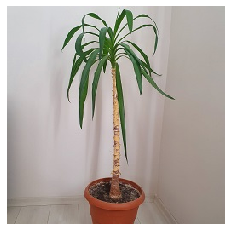

In [2]:
#The image is uploaded as 256*256
houseplant = np.array(Image.open(r'C:\Users\ubtn\Desktop\IE-05\Data Mining\HW2\Data\Image.jpeg'))
imshow(houseplant)
axis('off');

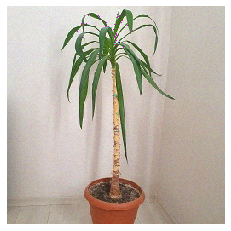

In [3]:
the_noise=np.zeros((256,256, 3))            #Noise that will be added to each channel
noisy_image=np.zeros((256,256, 3))          #the_noise+image
redmin=houseplant[:,:,0].min() 
redmax=houseplant[:,:,0].max()
gremin=houseplant[:,:,1].min()
gremax=houseplant[:,:,1].max()
blumin=houseplant[:,:,2].min()
blumax=houseplant[:,:,2].max()
channel_size=houseplant[:,:,0].size #for each channel (r,g,b)

noise_red=np.random.randint(redmin,0.1*redmax+1,channel_size)  # random-uniform integer noise value to be added       
noise_green=np.random.randint(gremin,0.1*gremax+1,channel_size)  # noise value to be added    
noise_blue=np.random.randint(blumin,0.1*blumax+1,channel_size)  # noise value to be added
for i in [noise_red,noise_green,noise_blue]:
    i.shape=(256,256)

the_noise[:,:,0]=noise_red; 
the_noise[:,:,1]=noise_green; 
the_noise[:,:,2]=noise_blue;

for j in range(3):     
    noisy_image[:,:,j]=houseplant[:,:,j]+the_noise[:,:,j]
plt.imshow(noisy_image.astype(np.uint8))
axis('off');

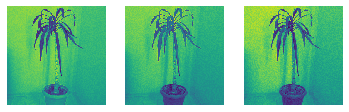

In [4]:
x,y=plt.subplots(1,3)
axis('off');
for j in range(3):
    y[j].imshow(noisy_image[:,:,j])
    y[j].axis('off');

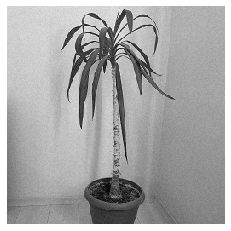

In [5]:
black_and_white = color.rgb2gray(noisy_image)
imshow(black_and_white,"gray")
axis('off');

In [6]:
#2.a Apply PCA
patch = image.extract_patches_2d(black_and_white, (25, 25))
patch.shape

(53824, 25, 25)

In [7]:
patches=np.zeros((53824,625))
patch=patch.reshape(patches.shape)       #We need to reduce it to 2-D 
patch.shape

(53824, 625)

The problem can be thought as if we have data with 53824 instances and 625 features.

In [8]:
cols=[]
for i in range(625):
    feat='Patch_'+ str(i)
    cols=np.append(cols,feat)
df=pd.DataFrame(data=patch,columns=cols)
df.head()

,Patch_0,Patch_1,Patch_2,Patch_3,Patch_4,Patch_5,Patch_6,Patch_7,Patch_8,Patch_9,...,Patch_615,Patch_616,Patch_617,Patch_618,Patch_619,Patch_620,Patch_621,Patch_622,Patch_623,Patch_624
0,226.5692,227.5009,220.3529,222.6315,222.1268,234.2145,230.6473,223.6375,230.2205,224.6944,...,221.8366,230.5828,227.2051,227.9415,220.6431,220.5806,222.5826,229.5788,221.8558,229.2712
1,227.5009,220.3529,222.6315,222.1268,234.2145,230.6473,223.6375,230.2205,224.6944,224.9846,...,230.5828,227.2051,227.9415,220.6431,220.5806,222.5826,229.5788,221.8558,229.2712,223.7817
2,220.3529,222.6315,222.1268,234.2145,230.6473,223.6375,230.2205,224.6944,224.9846,226.3453,...,227.2051,227.9415,220.6431,220.5806,222.5826,229.5788,221.8558,229.2712,223.7817,229.7250
3,222.6315,222.1268,234.2145,230.6473,223.6375,230.2205,224.6944,224.9846,226.3453,225.4989,...,227.9415,220.6431,220.5806,222.5826,229.5788,221.8558,229.2712,223.7817,229.7250,222.3393
4,222.1268,234.2145,230.6473,223.6375,230.2205,224.6944,224.9846,226.3453,225.4989,222.6163,...,220.6431,220.5806,222.5826,229.5788,221.8558,229.2712,223.7817,229.7250,222.3393,226.9031


In [9]:
#Standardize Data (Each Feature Column should have approximately 0 mean and 1 variance afterwards.)
std_x = df.values
std_x = StandardScaler().fit_transform(std_x)
df_std= pd.DataFrame(data = std_x, columns = cols)

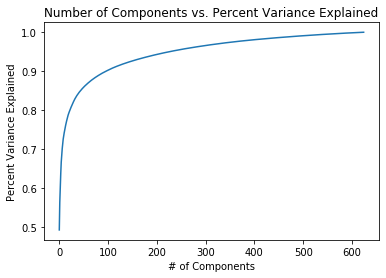

In [10]:
#Before performing PCA, decide on number of components to plot.
pca=PCA()
variance = pca.fit(std_x)
plt.plot(np.cumsum(variance.explained_variance_ratio_))
plt.xlabel('# of Components')
plt.ylabel('Percent Variance Explained') #for each component
plt.title('Number of Components vs. Percent Variance Explained')
plt.show()

Approximately 25 components is required to explain the 80% of the variance. As expected, we will not visualize it.

In [11]:
#Perform Principal Component Analysis 2D 
pca=PCA(n_components = 25)
fit_pca = pca.fit(std_x)
#principaldf = pd.DataFrame(data = pca_data , columns =cols[range(25)])  #Principal Components
#principaldf.head()

In [12]:
for i in range(25):
    print('Amount of Variance Explained by Component '+ str(i)+ ' is ' + str(round(fit_pca.explained_variance_ratio_[i]*100,2)) + '%')
print('Total variance explained by the 25 components is ' + str(round(sum(pca.explained_variance_ratio_)*100,1)) + '%')

Amount of Variance Explained by Component 0 is 49.17%
Amount of Variance Explained by Component 1 is 7.1%
Amount of Variance Explained by Component 2 is 3.98%
Amount of Variance Explained by Component 3 is 3.48%
Amount of Variance Explained by Component 4 is 2.9%
Amount of Variance Explained by Component 5 is 1.93%
Amount of Variance Explained by Component 6 is 1.51%
Amount of Variance Explained by Component 7 is 1.25%
Amount of Variance Explained by Component 8 is 1.2%
Amount of Variance Explained by Component 9 is 0.85%
Amount of Variance Explained by Component 10 is 0.74%
Amount of Variance Explained by Component 11 is 0.68%
Amount of Variance Explained by Component 12 is 0.67%
Amount of Variance Explained by Component 13 is 0.61%
Amount of Variance Explained by Component 14 is 0.59%
Amount of Variance Explained by Component 15 is 0.53%
Amount of Variance Explained by Component 16 is 0.51%
Amount of Variance Explained by Component 17 is 0.5%
Amount of Variance Explained by Component

Therefore, it can be commented that, 25 components are enough to explain 80% of the variance. If we need 90% of the variance explained, we should use around 80 components. As a result, there is a trade-off between more precise fit and performance of the algorithm.

In [13]:
pca_data = pca.fit_transform(std_x)
first_pca=pca_data[:,0].reshape(-1,1)     #It must be a column vector to perform a dot product.
second_pca=pca_data[:,1].reshape(-1,1)
third_pca=pca_data[:,2].reshape(-1,1)
first_pca.shape   

(53824, 1)

In [14]:
#2.b First Component
c1=pca.components_[0]
c_1=c1.reshape(1,-1)                     #It must be a row vector to perform the dot product.
c_1.shape

(1, 625)

In [15]:
#Take the dot product of the first projection and first component vector
dot_product_1 = np.dot(first_pca, c_1) + pca.mean_               
#Resize it and construct an image of size 256*256
image_c1=image.reconstruct_from_patches_2d(dot_product_1.reshape(53824,25,25), black_and_white.shape)  

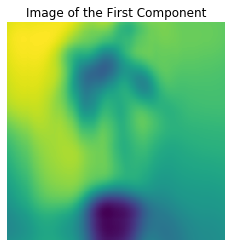

In [16]:
#Image of the First Component
imshow(image_c1)
plt.title('Image of the First Component')
axis('off');

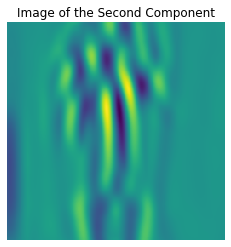

In [17]:
#2.b Second Component
c2=pca.components_[1]
c_2=c2.reshape(1,-1)                     #It must be a row vector to perform the dot product.
c_2.shape
#Take the dot product of the projection and component vector
dot_product_2 = np.dot(second_pca, c_2) + pca.mean_               
#Resize it and construct an image of size 256*256
image_c2=image.reconstruct_from_patches_2d(dot_product_2.reshape(53824,25,25), black_and_white.shape) 
#Image of the Second Component
imshow(image_c2)
plt.title('Image of the Second Component')
axis('off');

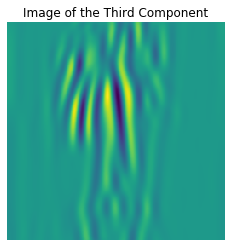

In [18]:
#2.b Third Component
c3=pca.components_[2]
c_3=c3.reshape(1,-1)                     #It must be a row vector to perform the dot product.
c_3.shape
#Take the dot product of the projection and component vector
dot_product_3 = np.dot(third_pca, c_3) + pca.mean_               
#Resize it and construct an image of size 256*256
image_c3=image.reconstruct_from_patches_2d(dot_product_3.reshape(53824,25,25), black_and_white.shape) 
#Image of the Third Component
imshow(image_c3)
plt.title('Image of the Third Component')
axis('off');

In [19]:
first_pca=pca_data[:,0].reshape(-1,1)     #Take the transpose
second_pca=pca_data[:,1].reshape(-1,1)
third_pca=pca_data[:,2].reshape(-1,1)


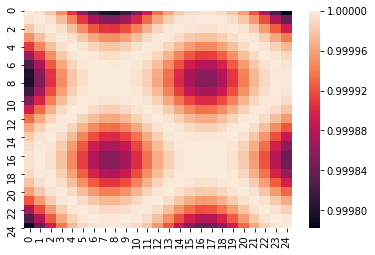

In [20]:
#2.c
c1=pca.components_[0].reshape(1,-1)
#Take the dot product of the first projection and first component vector
dot_product_1 = np.dot(first_pca, c1) + pca.mean_               
#Resize it and construct an image of size 256*256
imagec1=image.reconstruct_from_patches_2d(dot_product_1.reshape(53824,25,25), (25,25)) 
dfc1=pd.DataFrame(imagec1)
corr1=dfc1.corr()              #Find the correlation of patches
sns.heatmap(corr1);

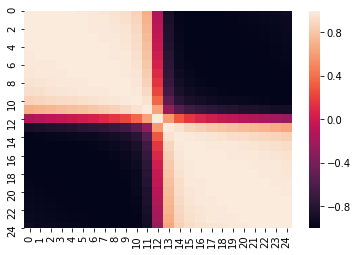

In [21]:
c2=pca.components_[1].reshape(1,-1)
#Take the dot product of the  projection and component vector
dot_product_2 = np.dot(second_pca, c2) + pca.mean_               
#Resize it and construct an image of size 256*256
imagec2=image.reconstruct_from_patches_2d(dot_product_2.reshape(53824,25,25), (25,25)) 
dfc2=pd.DataFrame(imagec2)
corr2=dfc2.corr()              #Find the correlation of patches
sns.heatmap(corr2);

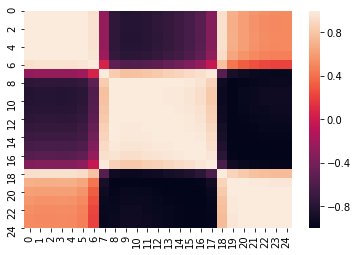

In [22]:
c3=pca.components_[2].reshape(1,-1)
#Take the dot product of the  projection and component vector
dot_product_3 = np.dot(third_pca, c3) + pca.mean_               
#Resize it and construct an image of size 256*256
imagec3=image.reconstruct_from_patches_2d(dot_product_3.reshape(53824,25,25), (25,25)) 
dfc3=pd.DataFrame(imagec3)
corr3=dfc3.corr()              #Find the correlation of patches
sns.heatmap(corr3);

We can see from the heatmaps where each component takes the corresponding area of the image. It might be related to the noise level being different for each channel. It also implies that as the component's variance explanation percent decreases, we start to see bigger patterns.